In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Deepak Raj\Desktop\Data_Science\Machine Learning\Data\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#age: age of primary beneficiary

#sex: insurance contractor gender, female, male

#bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
#objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

#children: Number of children covered by health insurance / Number of dependents

#smoker: Smoking

#region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

#charges: Individual medical costs billed by health insurance

## Basic checks

In [5]:
df.shape

(1338, 7)

In [6]:
#no of rows in the given dataset is 1338
#no of columns in the given dataset is 7

In [7]:
#information about the given numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#description about the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#information about the given categorical data
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Exploratory Data Analysis

## Univariate Analysis

In [10]:
#install sweetviz modules
!pip install sweetviz


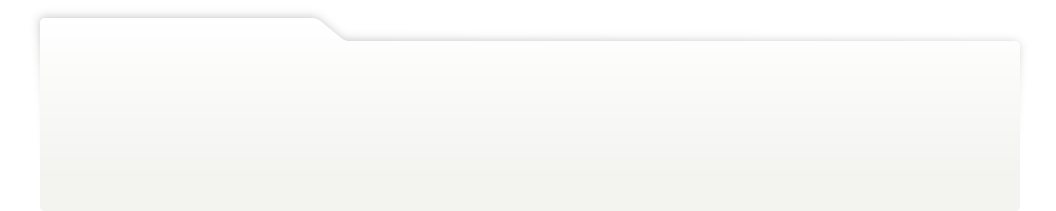
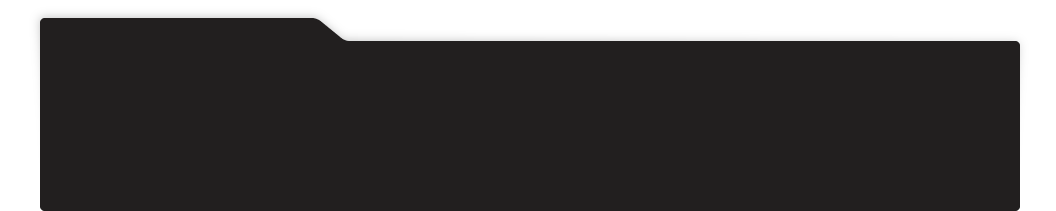
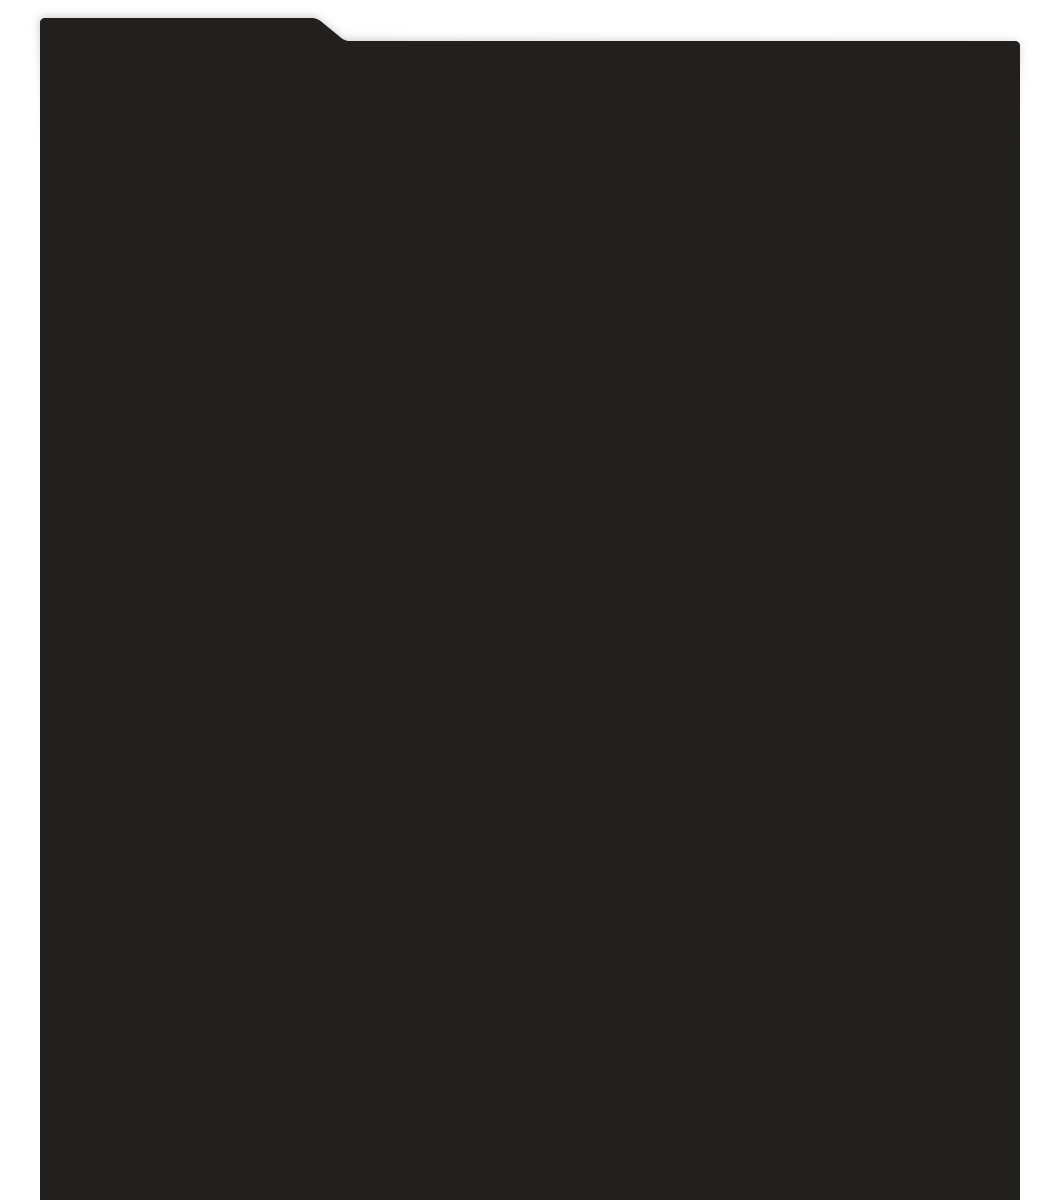
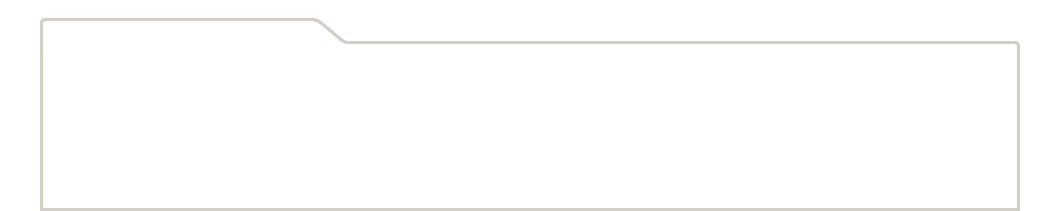
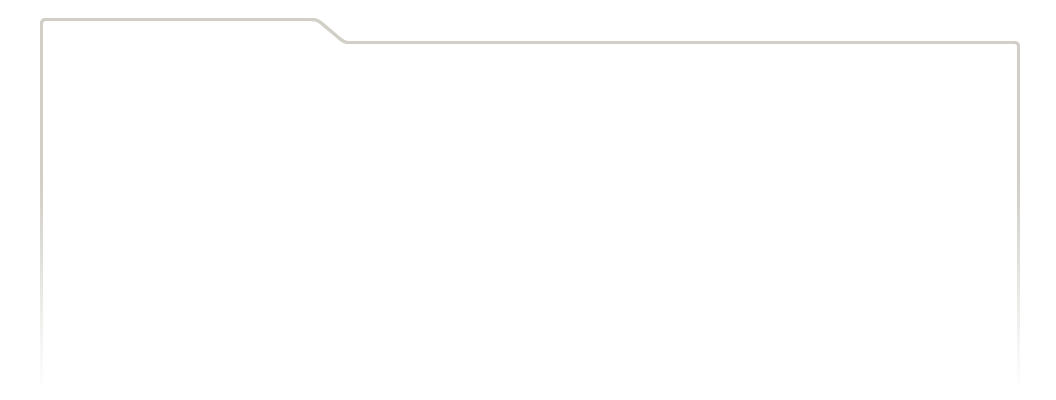
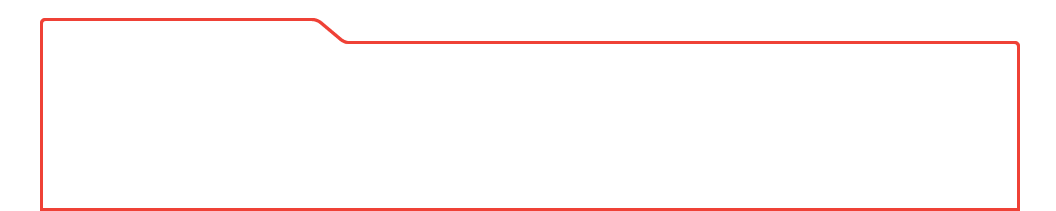
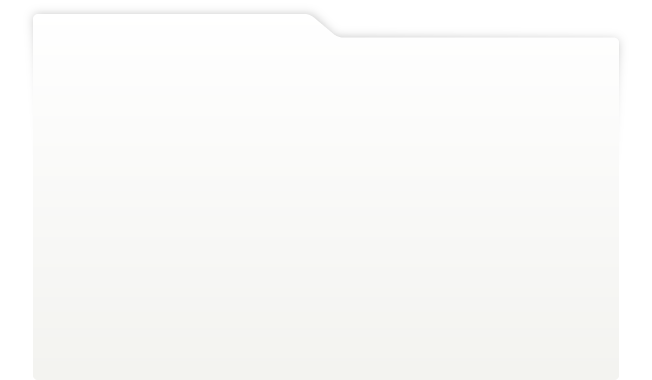
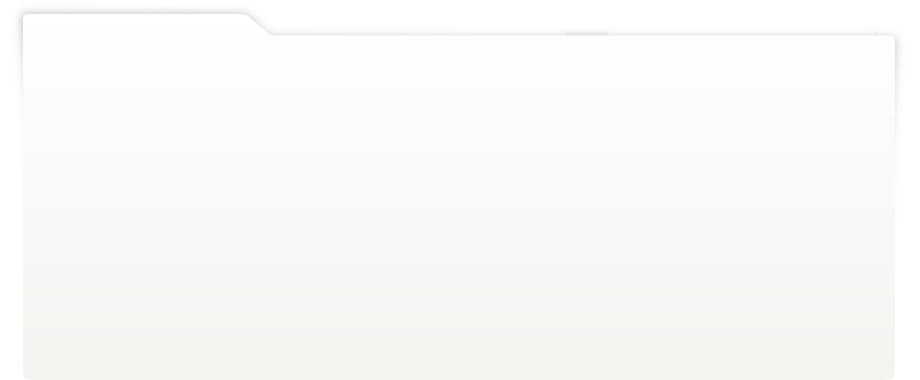
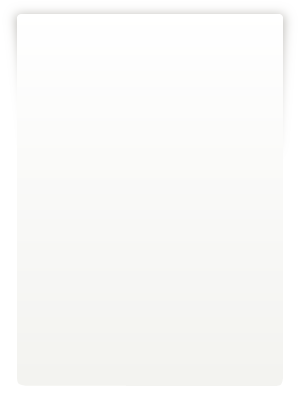
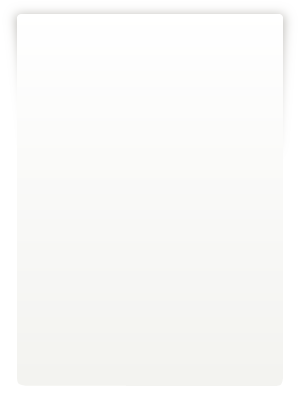
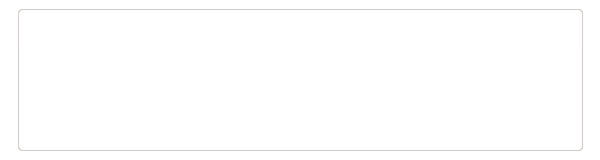
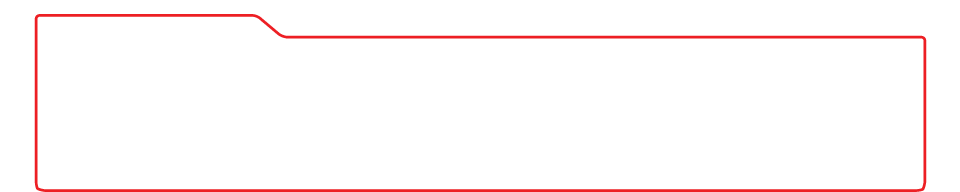
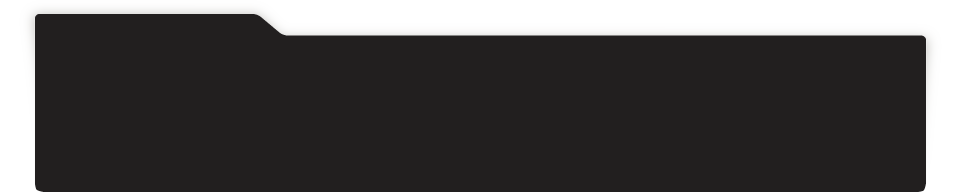
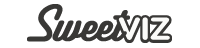
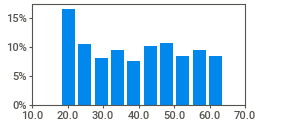
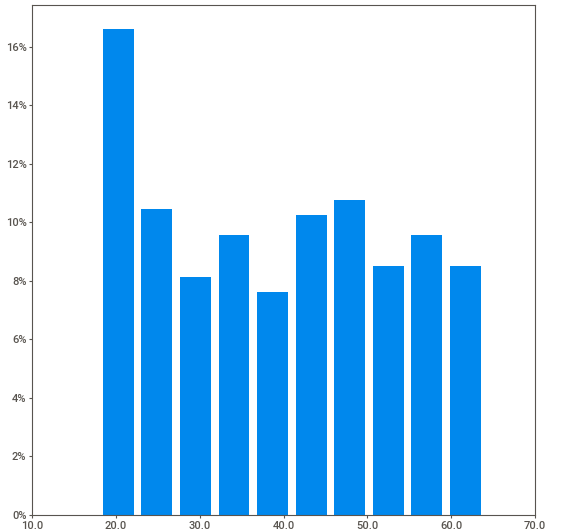
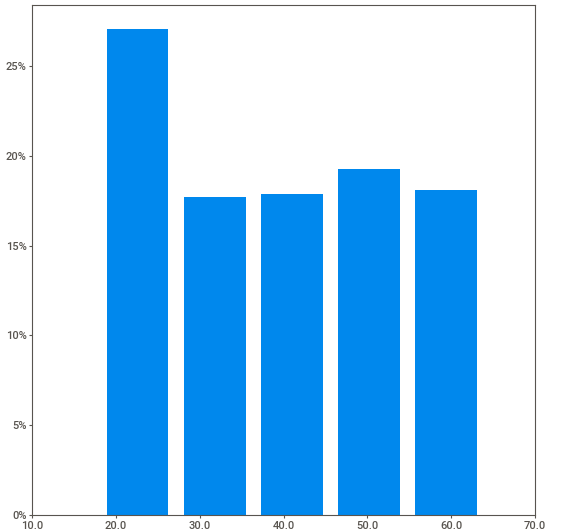
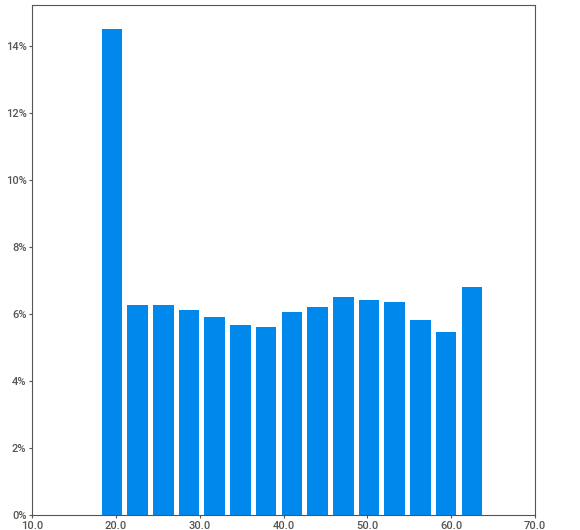
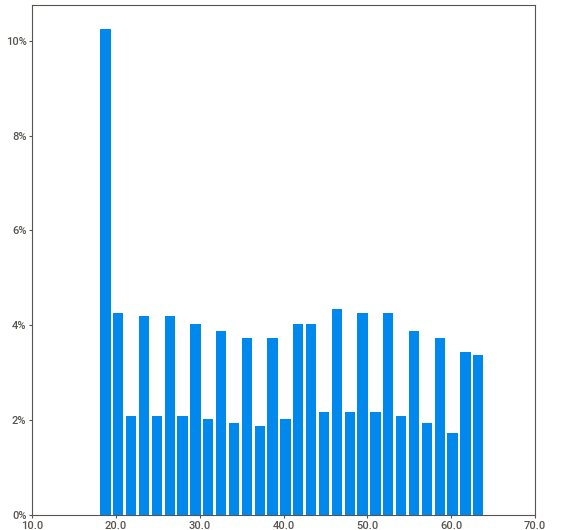
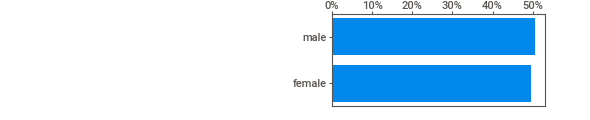
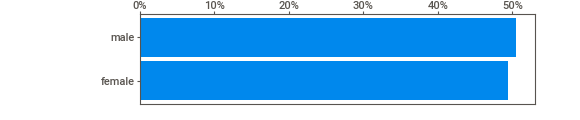
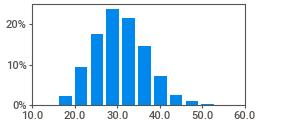
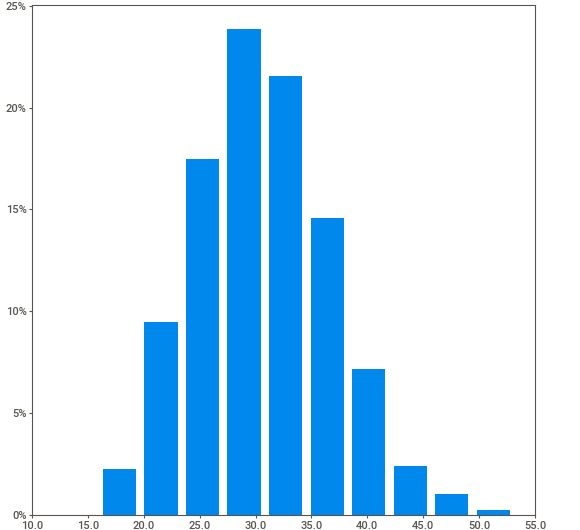
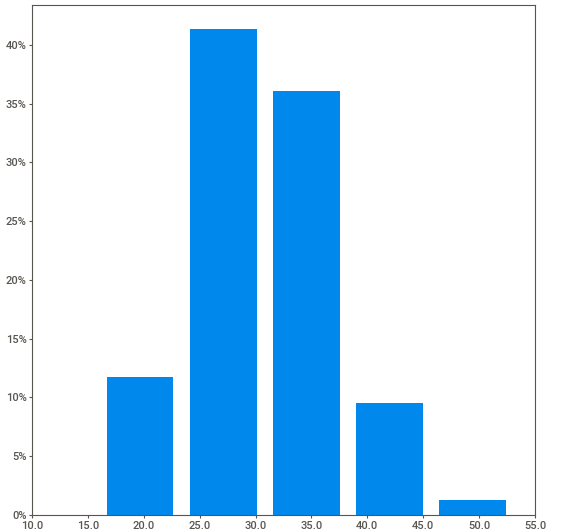
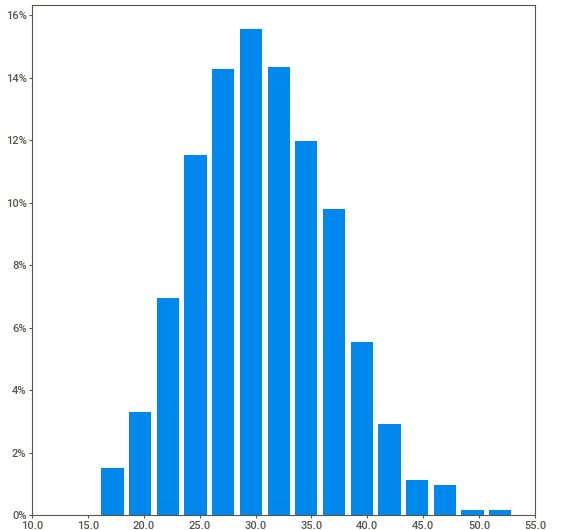
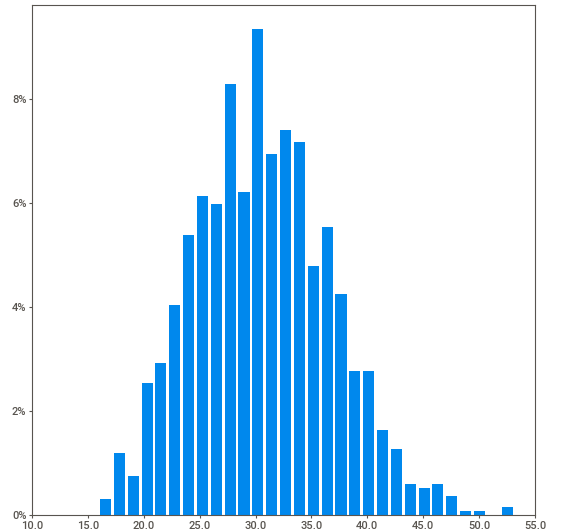
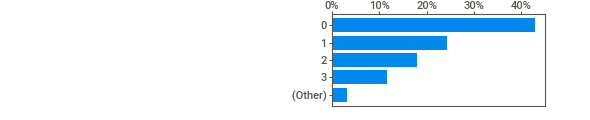
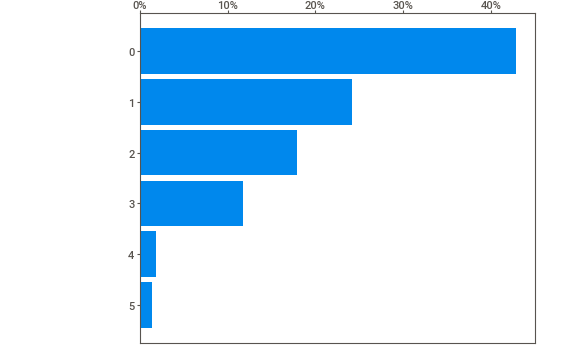
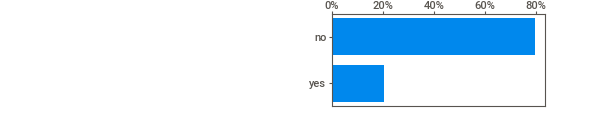
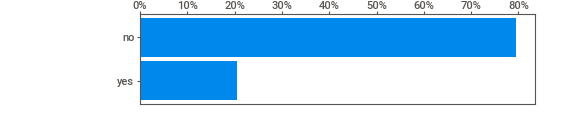
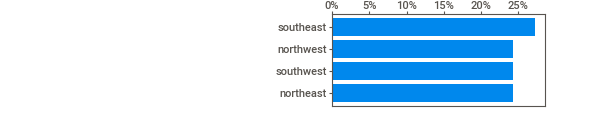
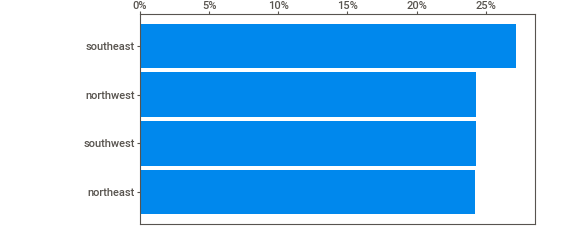
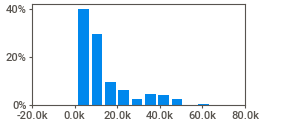
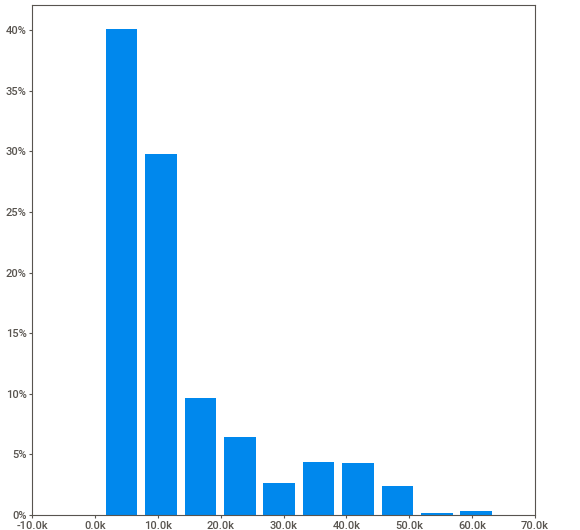
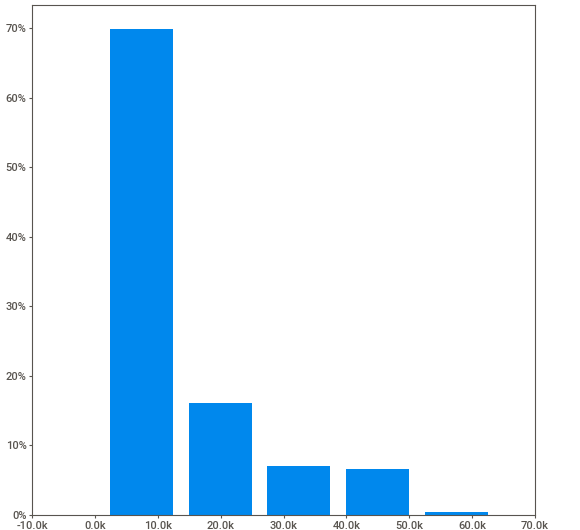
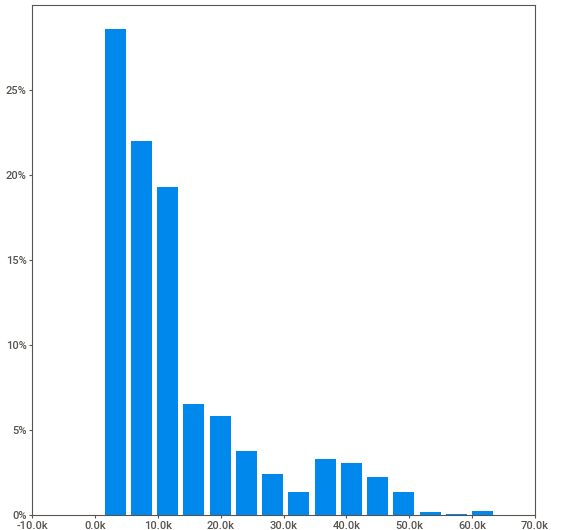
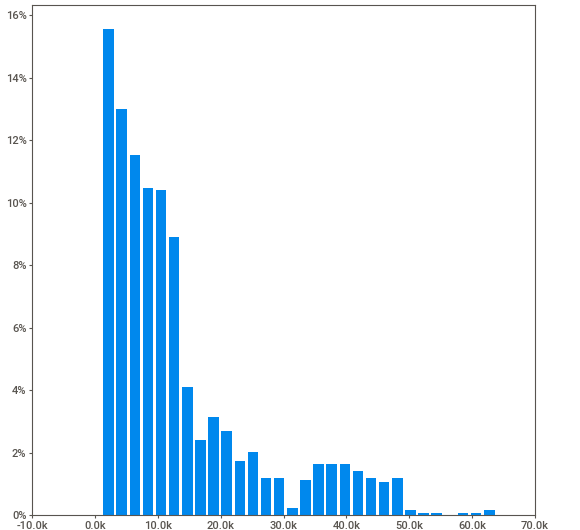
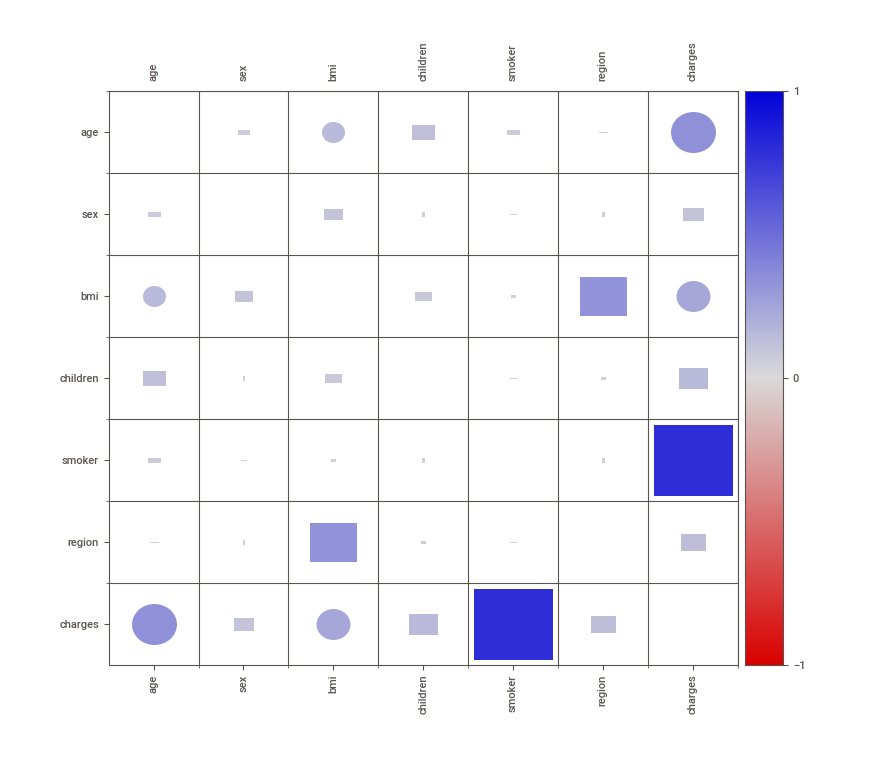
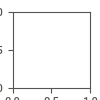

In [11]:
import sweetviz as sz
my_report=sz.analyze(df)
my_report.show_notebook()

## Bivariate Analysis

In [12]:
df1=df[['age','bmi','children','charges']]
df1

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


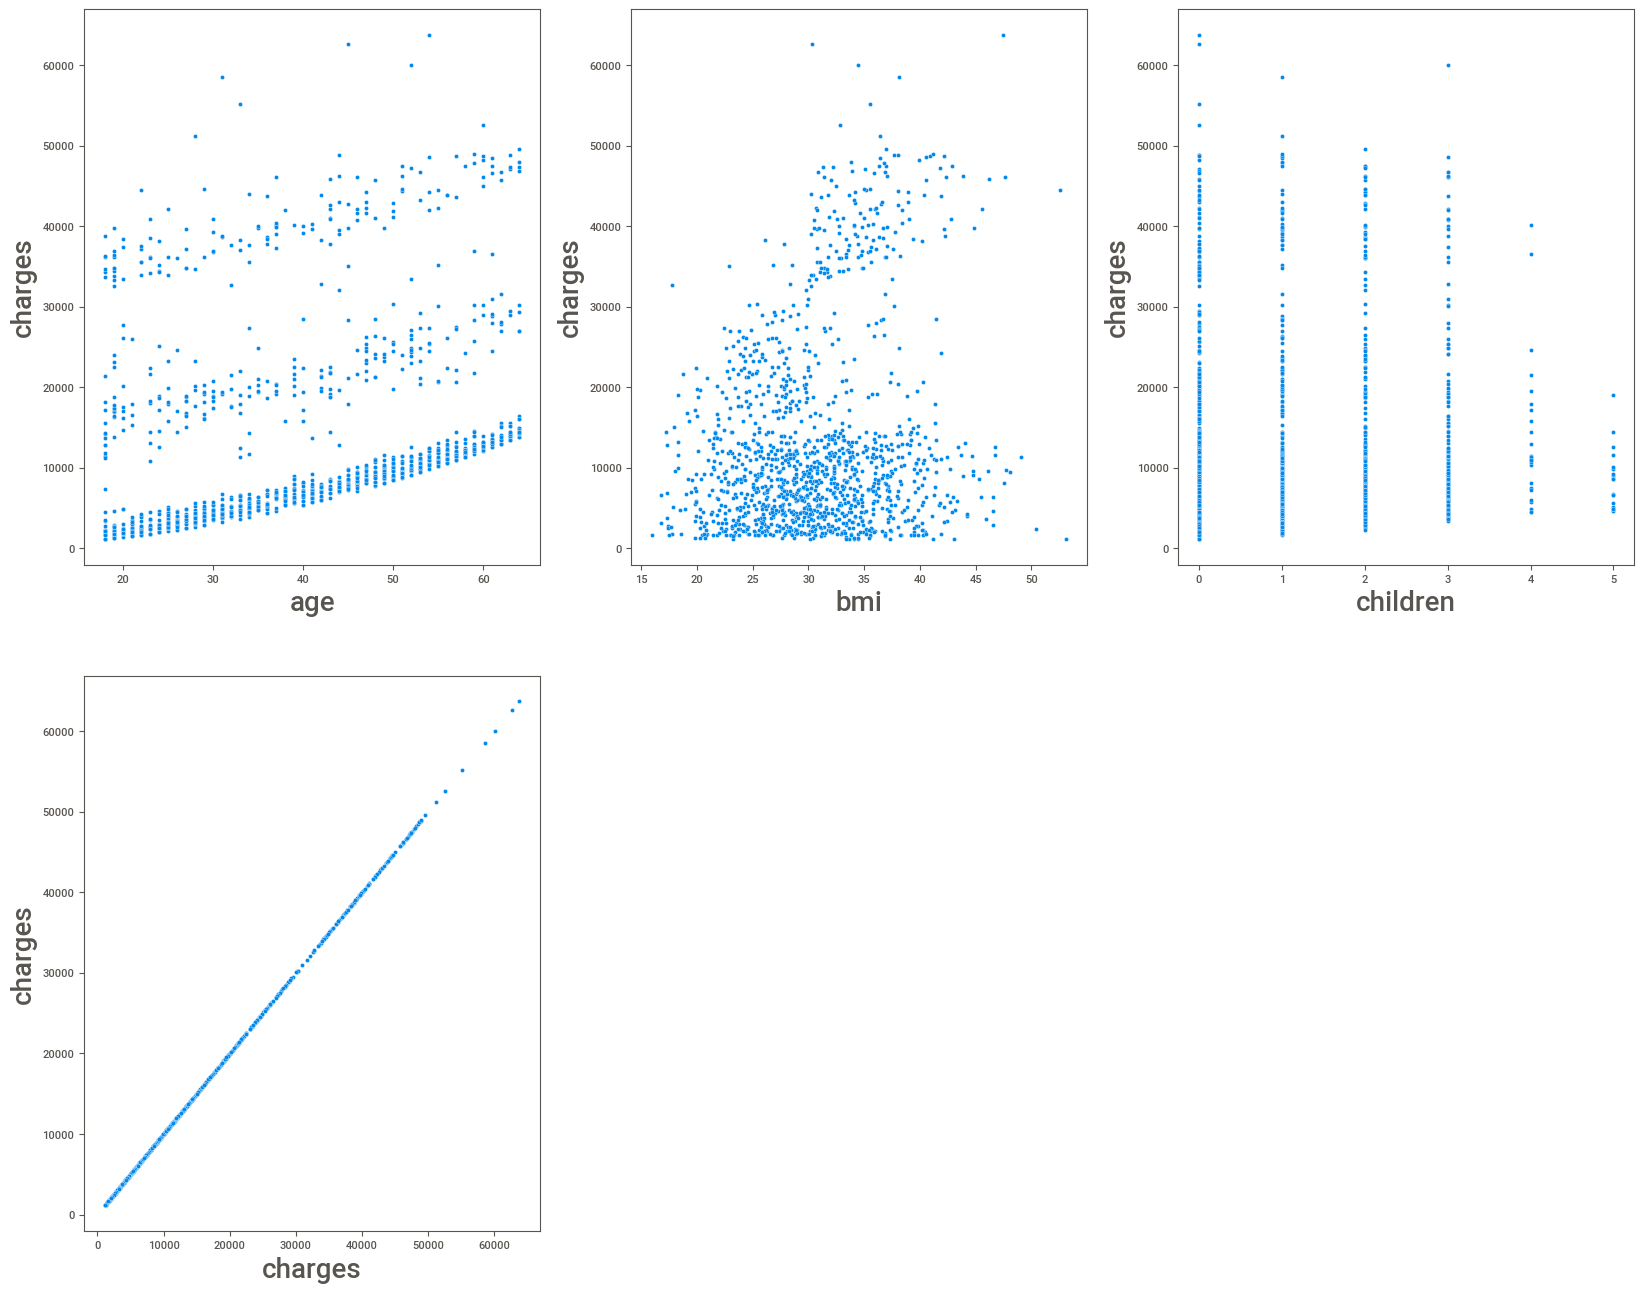

In [13]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df1: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=6 :     # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.scatterplot(x=df1[column].dropna(axis=0)#scatter plot
                        ,y=df.charges) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('charges',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

# Data Preprocessing

In [14]:
#missing value check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#no null values in the given dataset

<AxesSubplot:xlabel='bmi'>

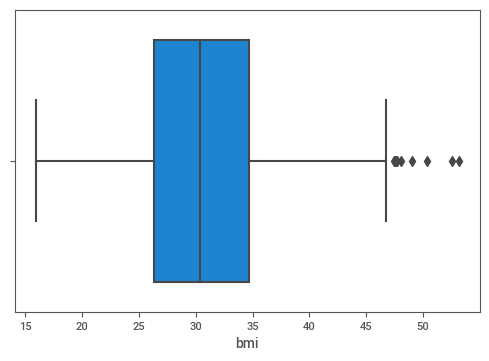

In [16]:
#outliers check
sns.boxplot(x='bmi',data=df)

In [17]:
#outlier treatment

In [18]:
df[df.bmi>45]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


In [19]:
df.bmi.mean()

30.663396860986538

In [20]:
#Replace outliers with mean
df.bmi[(df.bmi>45)]=df.bmi.mean()

<AxesSubplot:xlabel='bmi'>

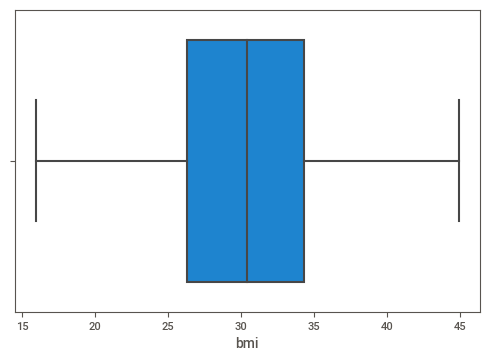

In [21]:
#after outliers treatment
sns.boxplot(x='bmi',data=df)

In [22]:
df.sex.value_counts()
# Total number of male gender is 676
# Total number of female gender is 662

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

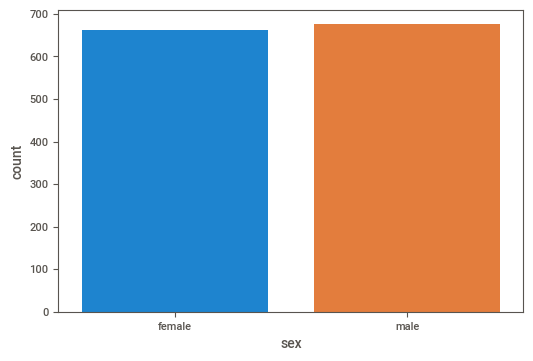

In [23]:
sns.countplot(x='sex',data=df)
#male gender are higher than female gender

In [24]:
# Encoding catagorical to discete numerical
df['sex'].replace('male', 1,inplace=True)#Replace  male with 1
df['sex'].replace( 'female', 0,inplace=True)#Replace  female with 0

In [25]:
df.smoker.value_counts()
#No of people are smoke is 274
#No of people are not smoke is 1064

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

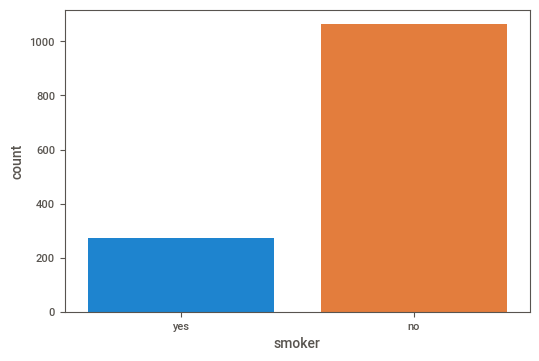

In [26]:
sns.countplot(x='smoker',data=df)
# Non smoker can higher than smoker

In [27]:
df['sex'].replace('male', 1,inplace=True)#Replace  male with 1
df['sex'].replace( 'female', 0,inplace=True)#Replace  female with 0

In [28]:
#After Replacing value with numerical
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [29]:
df['smoker'].replace('yes', 1,inplace=True)#Replace  smoker with 1
df['smoker'].replace( 'no', 0,inplace=True)#Replace  non smoker with 0

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [31]:
df.region.value_counts()
#No of people from southeast is 364
#No of people from southwest is 325
#No of people from northwest is 325
#No of people from northeast is 324

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

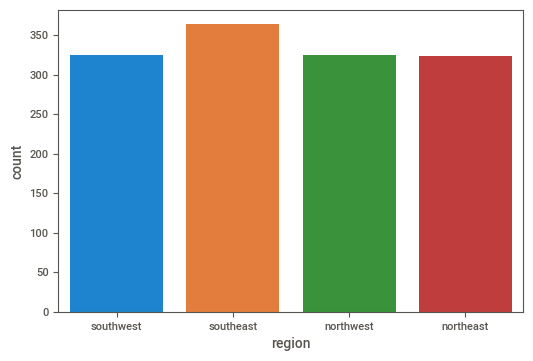

In [32]:
sns.countplot(x='region',data=df)
#southeast people are more

In [33]:
df['region'].replace('southeast', 1,inplace=True)#Replace  smoker with 1
df['region'].replace( 'southwest', 2,inplace=True)#Replace  non smoker with 0
df['region'].replace('northwest', 3,inplace=True)#Replace  smoker with 1
df['region'].replace( 'northeast', 4,inplace=True)#Replace  smoker with 1

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


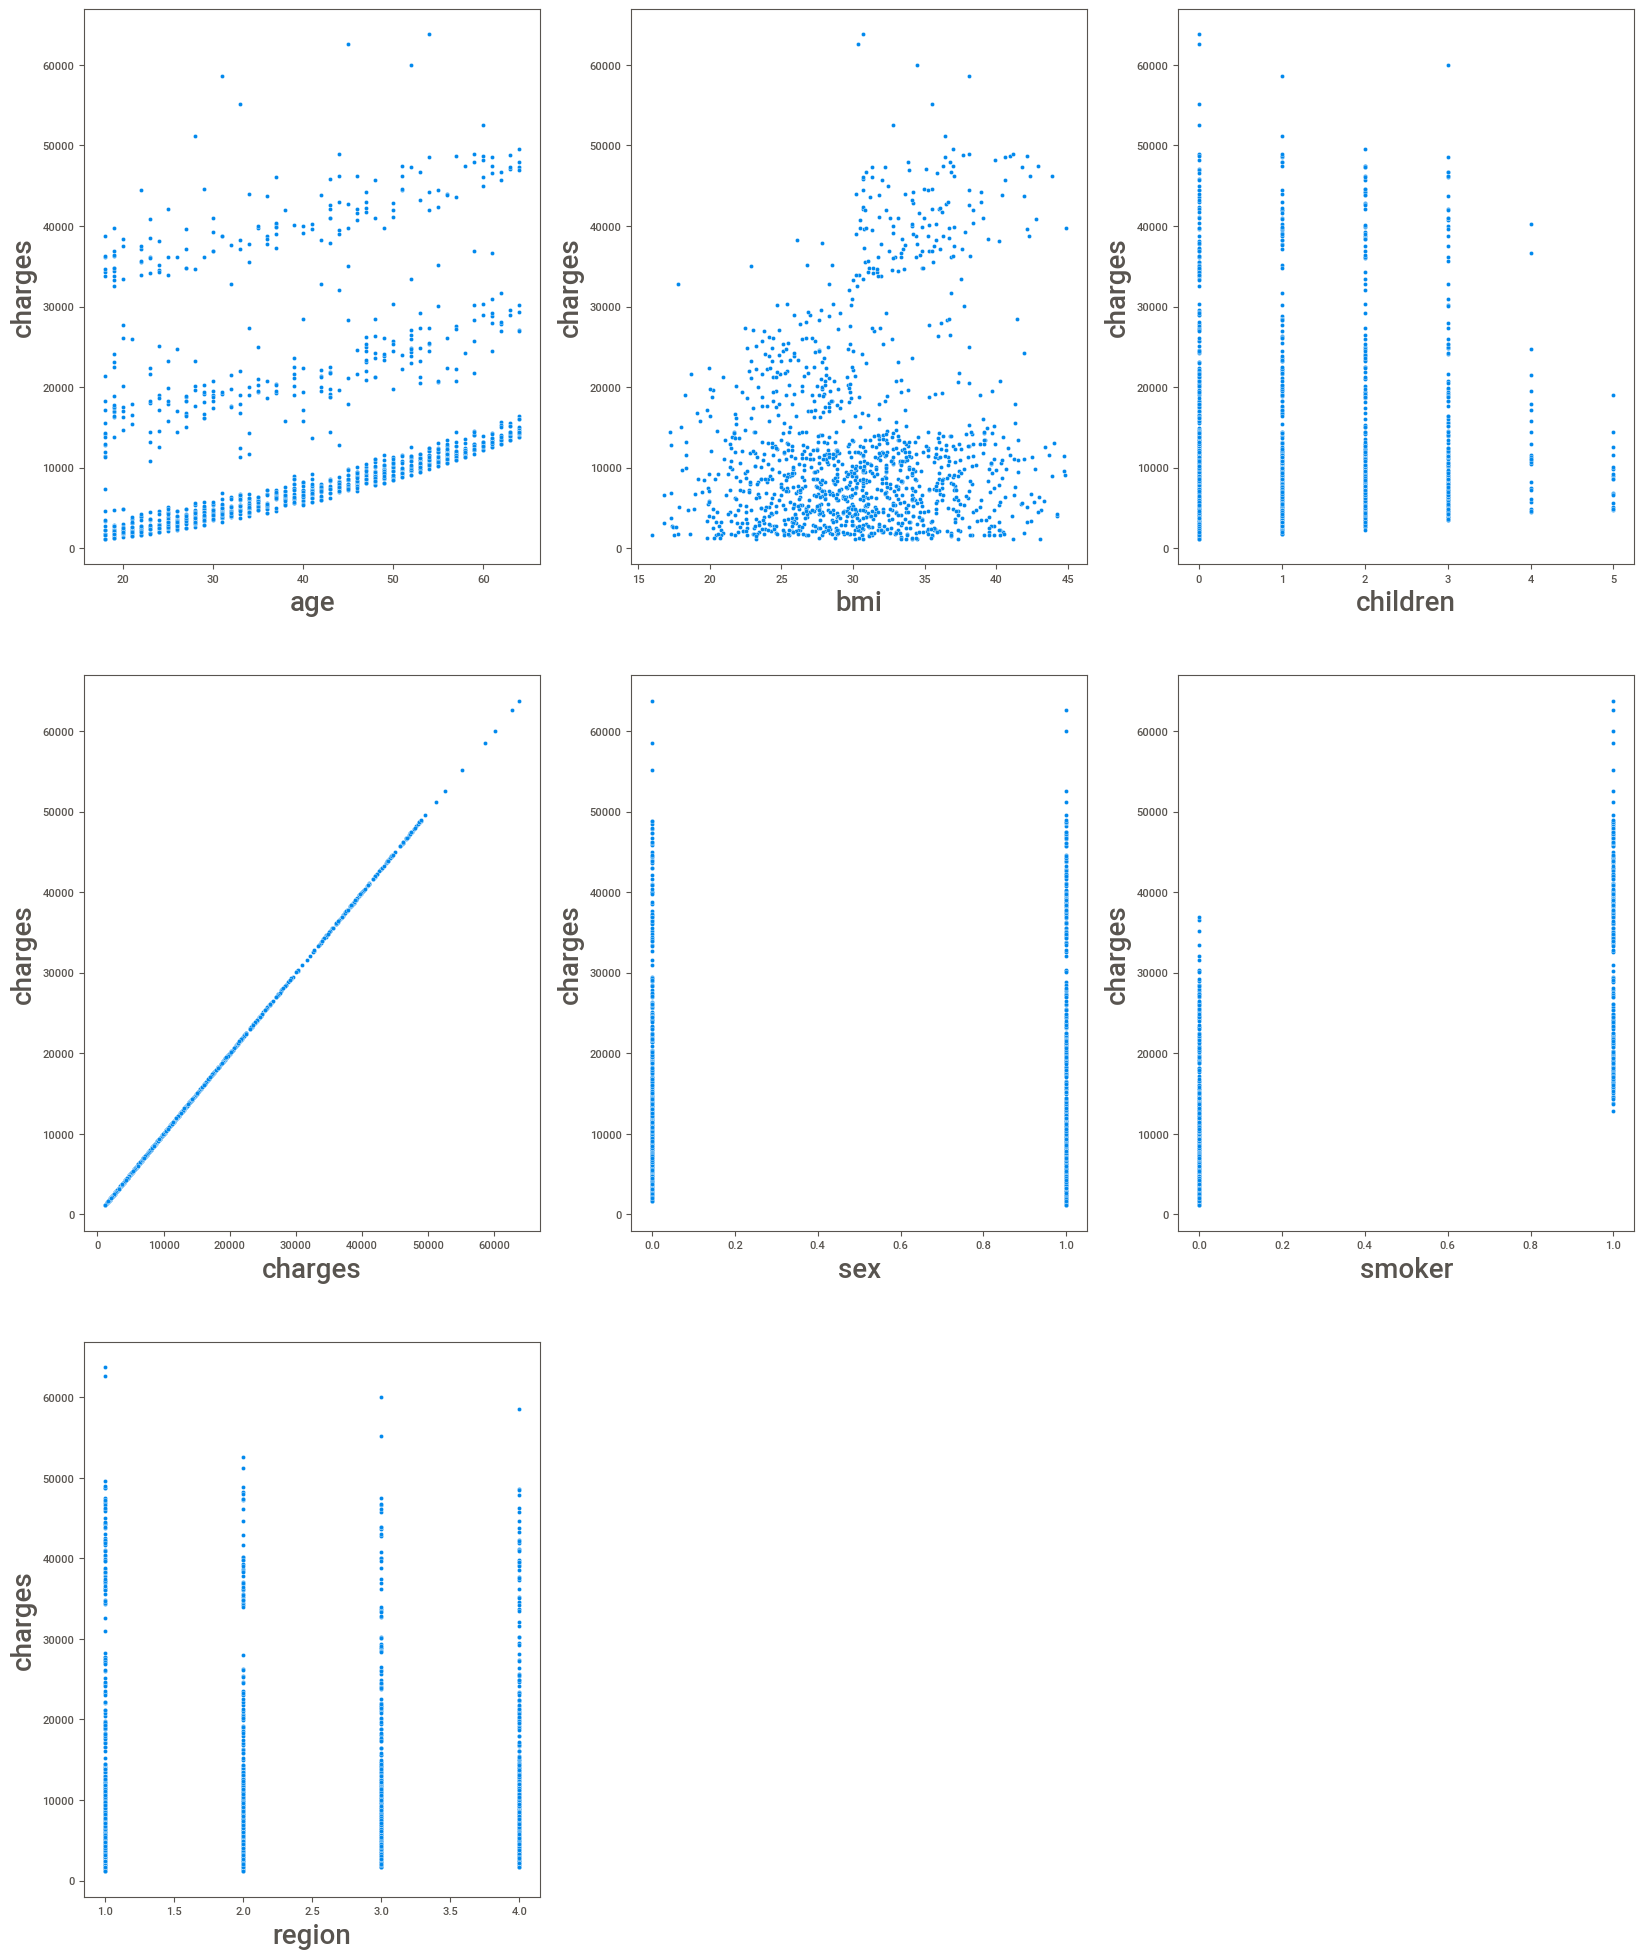

In [35]:
df1=df[['age','bmi','children','charges','sex','smoker','region']]
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df1: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=7 :     # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.scatterplot(x=df1[column].dropna(axis=0)#scatter plot
                        ,y=df.charges) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('charges',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

In [36]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
df[['bmi']]= sc.fit_transform(df[['bmi']])

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,-0.438668,0,1,2,16884.92400
1,18,1,0.586823,1,0,1,1725.55230
2,28,1,0.452304,3,0,1,4449.46200
3,33,1,-1.346237,0,0,3,21984.47061
4,32,1,-0.267462,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,0.097662,3,0,3,10600.54830
1334,18,0,0.263628,0,0,4,2205.98080
1335,18,0,1.124901,0,0,1,1629.83350
1336,21,0,-0.805539,0,0,2,2007.94500


## Feature Selection

<AxesSubplot:>

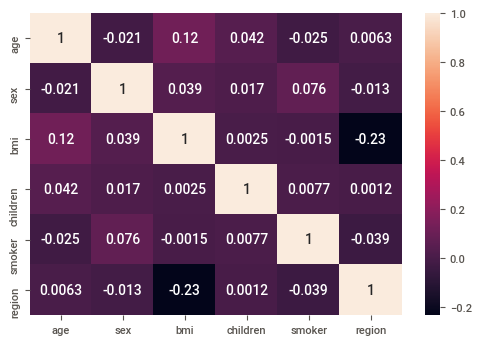

In [38]:
sns.heatmap(df.drop('charges',axis=1).corr(),annot=True)

## model building


In [39]:
x=df.iloc[:,0:-1] #independent variable
y=df.charges #target variable

In [40]:
#split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)#0.20 data as test data

In [41]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [42]:
LR.intercept_

-2524.1447788700607

In [43]:
yhat=LR.predict(x_test)

In [44]:
yhat

array([ 8706.59243189,  7114.39731422, 36779.15816087,  9433.24241366,
       27172.81626534, 11550.6673027 ,    52.27591118, 17155.46754097,
         648.43986583, 11268.55538558, 28329.96022553,  9490.60438748,
        5200.79874563, 38732.9137312 , 40495.59762402, 37319.43478666,
       15486.78202217, 36014.48041665,  8975.21652418, 31425.16915061,
        4065.73907149, 10530.31306106,  2753.89827712,  7302.54818995,
       11279.96708577, 12871.19134621, 14878.93962818,  6244.81557239,
        9734.45940474,  2203.64499554,  9387.51640175, 13124.47311743,
        4651.42024624,  3211.27392296,  4822.12189926, 13202.79576988,
        2202.46900068,  9083.60032581, 33147.29405178, 32726.58416458,
        4208.04311387,  4493.81234937, 14542.52410294, 11357.16246986,
        8924.97004913, 12326.82573164,  5460.20066331,  3316.86978453,
       35649.03669626,  9374.66142162, 15879.17893929,  2352.71690878,
       12706.8646193 ,  1346.64834097, 13451.15760312, 12538.46109472,
      

In [45]:
#performance measure
#mean absolute error
##prediciton on training data
y_train_predict=LR.predict(x_train)
from sklearn.metrics import mean_absolute_error
train_score=mean_absolute_error(y_train,y_train_predict)
train_score #train_score

4225.404537576474

In [46]:
test_score=mean_absolute_error(y_test,yhat)
test_score

4197.918129948477

In [47]:
#mean square error
y_train_predict=LR.predict(x_train)
from sklearn.metrics import mean_squared_error
train_score=mean_squared_error(y_train,y_train_predict)
train_score #train_score

37116946.11143431

In [48]:
test_score=mean_squared_error(y_test,yhat)
test_score #test_score

34708438.3395668

In [49]:
#r2square 
y_train_predict=LR.predict(x_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score #train_score

0.742839224746774

In [50]:
test_score=r2_score(y_test,yhat)
test_score #test_score

0.776433353071191

In [51]:
#based on test and strain score the line are good fit and high correlation.